# Video Game Apakah yang Potensial untuk di Iklankan?

Kita bekerja di toko online "Ice" yang menjual video game dari seluruh dunia. Data terkait ulasan pengguna dan ahli game, genre, platform (misalnya, Xbox atau PlayStation), dan data historis penjualan game tersedia dari open source. Kita perlu mengidentifikasi pola-pola yang menentukan apakah suatu game bisa dikatakan berhasil atau tidak. Dengan begitu, kita bisa menemukan game yang paling potensial dan merencanakan kampanye iklannya.

Kita memiliki data dari tahun 2016. Asumsikan sekarang adalah bulan Desember tahun 2016 dan kita sedang merencanakan kampanye untuk tahun 2017.

Dataset ini juga memuat singkatan ESRB. ESRB merupakan singkatan dari Entertainment Software Rating Board, yaitu sebuah organisasi regulator mandiri yang mengevaluasi konten game dan memberikan rating usia seperti Remaja atau Dewasa.

Tujuan : 
   - Menemukan dan merencanakan kampanye iklan untuk tahun 2017 terhadap penjualan video game dari seluruh dunia, berdasarkan:
       1. Platform apa yang paling banyak digunakan?
       2. Genre video game apa yang populer?
       3. Apakah rating pengguna mempengaruhi penjualan di masing-masing wilayah?

Kerangka Konsep :
   1. Mempersiapkan Data
   2. Memperbaiki dan Memperkaya kualitas data
   3. Mempelajari parameter data
   4. Menganalisis data, berdasarkan periode waktu yang terbaru
   5. Menguji Hipotesis Statistik
   6. Kesimpulan umum

## Deskripsi Data

Dataframe memuat:
   - `Name` — nama game
   - `Platform` — nama platform
   - `Year_of_Release` — tahun game awal rilis
   - `Genre` — tipe game
   - `NA_sales` — penjualan di Amerika Utara dalam satuan juta USD
   - `EU_sales` — penjualan di Eropa dalam satuan juta USD
   - `JP_sales` — penjualan di Jepang dalam satuan juta USD
   - `Other_sales` — penjualan di negara lainnya dalam satuan juta USD
   - `Critic_Score` — skor ulasan dari kritikus, maksimal 100
   - `User_score` — skor ulasan dari pengguna, maksimal 10
   - `Rating` — ESRB

## Inisialisasi Library

Memuat library dictionary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Memuat Data

Memuat data

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('games.csv')

## Mengenal & Mempersiapkan Data

Melihat informasi data serta sample data untuk mencari tahu permasalahan apa saja yang ada pada dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Terlihat pada informasi data kita memiliki beberapa masalah, seperti:
   - Nilai yang hilang pada kolom Year_of_Release, Name, Genre, Critic_Score, User_Score, dan Rating.
   - Tipe data yang tidak sesuai pada kolom Year_of_Release, dan User_Score.
   - Penggunaan huruf kapital untuk kolom juga perlu kita ubah menjadi kecil agar mempermudah analisis

In [4]:
df.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
5854,Batman: Arkham VR,PS4,2016.0,Action,0.25,0.0,0.0,0.06,75.0,7.3,M


In [5]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [7]:
df.duplicated().sum()

0

Dataframe tidak memiliki nilai duplikat

In [8]:
report_null = df.isnull().sum().to_frame()
report_null = report_null.rename(columns={0:'missing_values'})
report_null['% of total'] = (report_null['missing_values'] / df.shape[0]).round(2)
report_null.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


Pada report_null menunjukkan beberapa kolom memiliki nilai yang hilang. Mengingat nilai yang hilang cukup tinggi pada kolom Critic_Score, Rating, dan User_Score maka kolom tersebut akan kita hiraukan dahulu. Sedangkan pada kolom Years_of_Release akan kita isi nilai yang hilang dengan nilai 0, dan untuk kolom Name, dan Genre akan kita eliminasi mengingat hanya 2 nilai yang hilang dari 16715 baris.

### Memperbaiki Data

Memformat seluruh karakter pada kolom menjadi huruf kecil

In [9]:
df.columns = [i.lower() for i in list(df)]

Mengisi nilai yang hilang pada kolom year_of_release dengan nilai 0, serta mengeliminasi baris yang null pada kolom name dan genre.

In [10]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [11]:
df = df.dropna(subset=['name', 'genre'])

In [12]:
report = df.isnull().sum().to_frame()
report = report.rename(columns={0:'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by='missing_values', ascending=False)

,missing_values,% of total
critic_score,8576,0.51
rating,6764,0.40
user_score,6699,0.40
name,0,0.00
platform,0,0.00
year_of_release,0,0.00
genre,0,0.00
na_sales,0,0.00
eu_sales,0,0.00
jp_sales,0,0.00


Mengganti nilai 'tbd' pada kolom user_score menjadi NaN menggunakan numpy

In [13]:
df.select_dtypes(include='object')

,name,platform,genre,user_score,rating
0,Wii Sports,Wii,Sports,8,E
1,Super Mario Bros.,NES,Platform,NaN,NaN
2,Mario Kart Wii,Wii,Racing,8.3,E
3,Wii Sports Resort,Wii,Sports,8,E
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,NaN,NaN
...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,NaN,NaN
16711,LMA Manager 2007,X360,Sports,NaN,NaN
16712,Haitaka no Psychedelica,PSV,Adventure,NaN,NaN
16713,Spirits & Spells,GBA,Platform,NaN,NaN


In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Mengubah tipe data pada kolom year_of_release menjadi int, dan kolom user_score menjadi float.

In [15]:
df['user_score'] = df['user_score'].astype('float')

In [16]:
df['year_of_release'] = df['year_of_release'].astype('int')

### Memperkaya Kualitas Data

Menambahkan kolom baru total_sales untuk total penjualan dari semua sumber sales (na_sales, eu_sales, jp_sales dan other_sales). Menggunakan for loop untuk list kolom sales yang kemudian dijumlahkan dengan cara sum dengan argumen tambahan axis untuk penjumlahan pada baris. 

In [17]:
df['total_sales'] = df[[i for i in list(df) if 'sales' in i]].sum(axis=1)

In [18]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Mempelajari Parameter Data

### Game Rilis Terbanyak

Mencari tahu berapa banyak video game yang dirilis per tahunnya dengan cara kita hitung untuk kolom name yang di agregasikan dengan kolom year_of_release.

In [19]:
year_game = df.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
year_game.tail(10)

,year_of_release,name
28,2007,1197
29,2008,1427
30,2009,1426
31,2010,1255
32,2011,1136
33,2012,653
34,2013,544
35,2014,581
36,2015,606
37,2016,502


<AxesSubplot:title={'center':'Rata-rata Game di Rilis per Tahun'}, xlabel='year_of_release'>

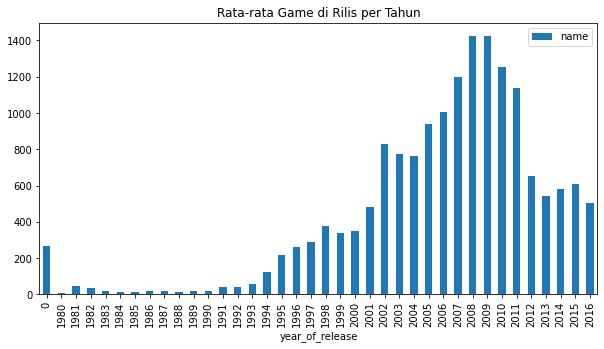

In [20]:
year_game.plot(x='year_of_release', kind='bar', title='Rata-rata Game di Rilis per Tahun', figsize=(10,5))

Terlihat pada grafik batang menunjukkan bahwa game yang paling banyak dirilis yaitu pada tahun 2007 - 2011, dengan tahun 2008 dan 2009 yang memiliki perilisan game paling banyak lebih dari 1400 game per tahunnya. Akan tetapi terjadi penurunan yang signifikan pada tahun 2012. Ada kemungkinan penurunan di karenakan oleh penjualan atau rating dari game sebelumnya yang dirilis sehingga para developer mulai mengevaluasi untuk game lebih baik lagi di tahun berikutnya.

### Game Sales Terbanyak

Sekarang kita akan mencari tahu penjualan game berdasarkan platform yang di gunakan, pertama kita agregasikan kolom platform dengan kolom total_sales menggunakan pivot_table.

In [21]:
platform_sales = df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False).reset_index()
platform_sales.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


<AxesSubplot:title={'center':'Data Penjualan Berdasarkan Platform'}, xlabel='platform'>

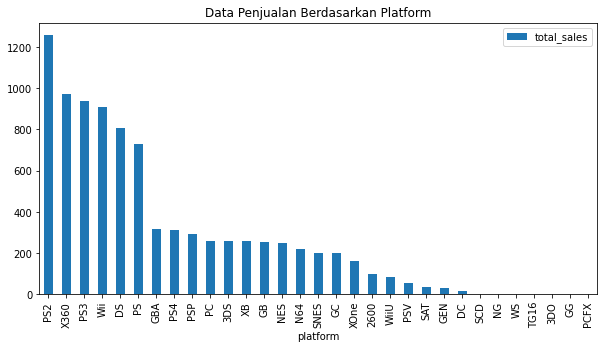

In [22]:
platform_sales.sort_values(by='total_sales', ascending=False).plot(x='platform', kind='bar', title='Data Penjualan Berdasarkan Platform', figsize=(10,5))

Terlihat pada grafik untuk platform 'PS 2' memiliki penjualan paling banyak hingga lebih dari 1200 dolar, kemudian ada Xbox 360, PS 3, dan lainnya. Mengingat data yang kita miliki merupakan data dari tahun 90 hingga tahun 2016, kita hanya memiliki sedikit informasi apakah data tersebut relevan dengan tahun saat ini. Bisa jadi untuk tahun sekarang Xbox One yang memiliki penjualan paling banyak.

In [23]:
sales_platform_years = df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').fillna(0).drop(0)
sales_platform_years.tail()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
2012,0.0,0.0,51.36,0.0,11.01,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.71,17.56,99.74,0.0,0.00
2013,0.0,0.0,56.57,0.0,1.54,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.59,21.65,88.58,0.0,18.96
2014,0.0,0.0,43.76,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.75,22.03,34.74,0.0,54.07
2015,0.0,0.0,27.78,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.14,16.35,11.96,0.0,60.14
2016,0.0,0.0,15.14,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.18,4.60,1.52,0.0,26.15


<AxesSubplot:xlabel='year_of_release'>

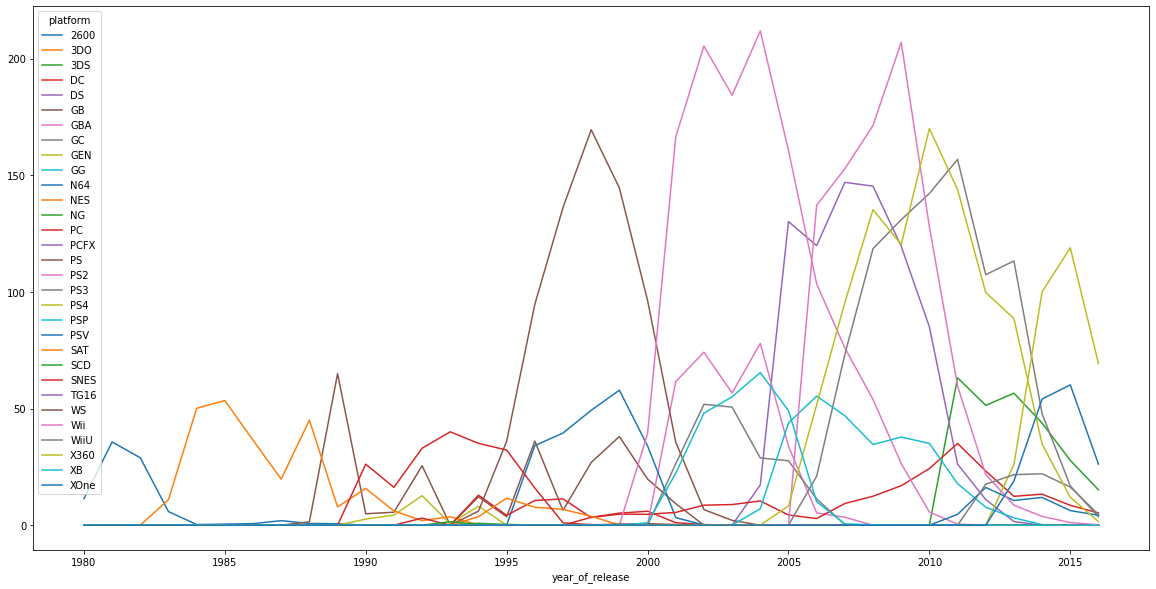

In [24]:
sales_platform_years.plot(figsize=(20,10))

<AxesSubplot:title={'center':'Top 5 Sales Lifetime'}, xlabel='year_of_release'>

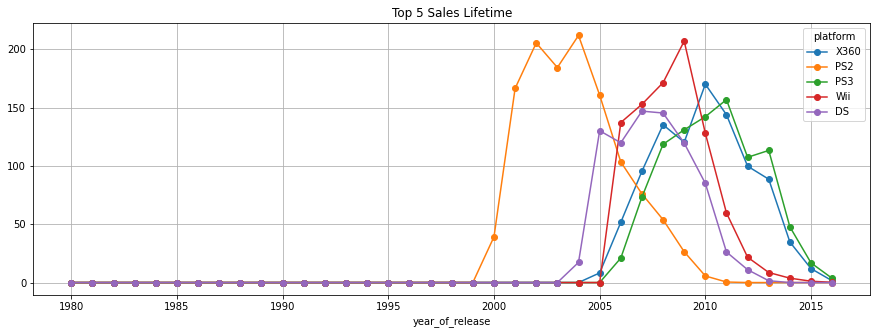

In [25]:
sales_platform_years[['X360', 'PS2', 'PS3', 'Wii', 'DS']].plot(style='o-', title='Top 5 Sales Lifetime', grid=True, figsize=(15, 5))

<AxesSubplot:title={'center':'Top 1 Sales Lifetime "PS 2"'}, xlabel='year_of_release'>

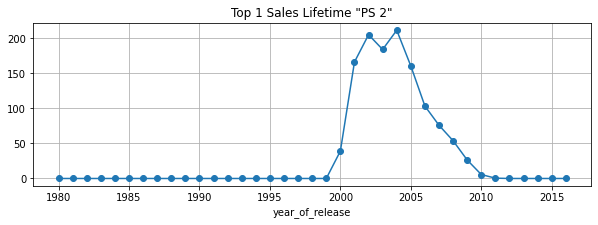

In [26]:
sales_platform_years['PS2'].plot(style='o-', title='Top 1 Sales Lifetime "PS 2"', grid=True, figsize=(10, 3))

Seperti dugaan di awal platform PS2 mungkin memiliki historis penjualan terbaik dari yang lain, akan tetapi untuk tahun saat ini bahkan penjualannya tidak ada satu pun.

Pada penjualan terbanyak yang lainnya seperti Xbox 360 dan PS3 masih memiliki penjualan di tahun saat ini. ini bisa mereferensikan kita untuk mencari tahu penjualan game pada platform apa sajakan yang lebih relevan dan signifikan pendapatannya untuk bisa dijadikan bahan acuan kedepannya.

## Analisis Data pada Periode Waktu yang Relevan

Berdasarkan indikasi yang kita dapatkan sebelumnya, maka kita akan memfilter datanya untuk 5 tahun kebelakang agar data yang akan kita uji lebih relevan dan efisien untuk perencanaan.

In [27]:
new_df = df.loc[df['year_of_release'] >= 2012].reset_index(drop=True)
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### Platform Sales

Kita hitung ulang pada platform untuk penjualannya

In [28]:
new_sales = new_df.pivot_table(index='platform', values='total_sales', aggfunc='sum')
new_sales = new_sales.sort_values(by='total_sales', ascending=False).reset_index()
new_sales

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


<AxesSubplot:title={'center':'Penjualan Berdasarkan Platform 5 Tahun kebelakang'}, xlabel='platform'>

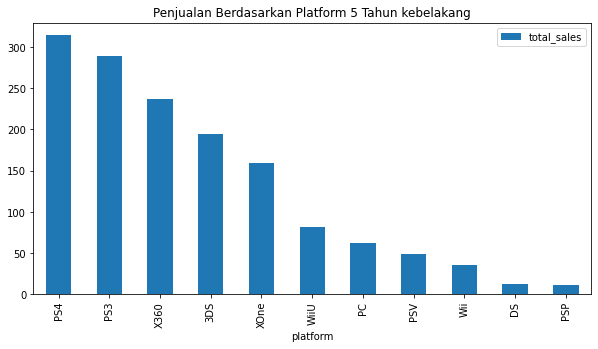

In [29]:
new_sales.plot(x='platform', kind='bar', title='Penjualan Berdasarkan Platform 5 Tahun kebelakang', figsize=(10,5))

Setelah kita mensortir datanya untuk 5 tahun kebelakang, sekarang kita memiliki data yang relevan dengan PS 4 yang memiliki nilai tertinggi dengan lebih dari 300 dolar penjualan. Mengingat PS4 merupakan platform dengan keluaran terbaru dari pendahulunya yaitu PS3 ataupun PS2 ini mengindikasikan juga bahwa data historis perlu kita teliti kembali untuk mencari aktual data yang eksis untuk waktu sekarang.

In [30]:
new_sales_year = new_df.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').fillna(0)
new_sales_year.tail()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


<AxesSubplot:xlabel='year_of_release'>

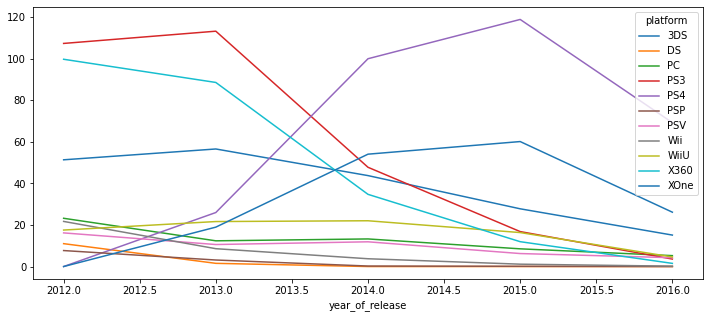

In [31]:
new_sales_year.plot(figsize=(12,5))

<AxesSubplot:title={'center':'Top 5 Sales Updated'}, xlabel='year_of_release'>

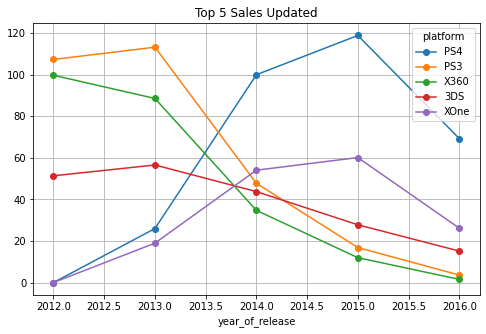

In [32]:
new_sales_year[['PS4', 'PS3', 'X360', '3DS', 'XOne']].plot(style='o-', title='Top 5 Sales Updated', grid=True, figsize=(8, 5))

Terlihat pada grafik penjualan untuk platform dari tahun 2012 - 2016 di dominasi PS4 yang grafiknya memiliki puncak paling tinggi di angka 120 dolar pada tahun 2015, lalu diikuti oleh PS3, Xbox 360, Xbox One, dan 3DS. 

<AxesSubplot:title={'center':'Top 1 Sales Updated "PS 4"'}, xlabel='year_of_release'>

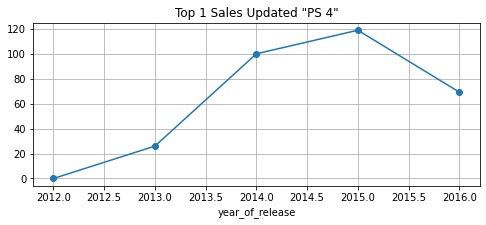

In [33]:
new_sales_year['PS4'].plot(style='o-', title='Top 1 Sales Updated "PS 4"', grid=True, figsize=(8, 3))

Pertumbuhan sales pada platform PS4 bisa kita lihat mulai dari tahun 2012 terus tumbuh hingga tahun 2015 yang kemudian mulai turun di tahun 2016. Ternyata kita bisa lihat bahwa pertumbuhannya bertahan selama 3 tahun kemudian mulai menurun yang bisa dikarenakan generasinya mulai tergantikan atau terjadinya perputaran pasar.

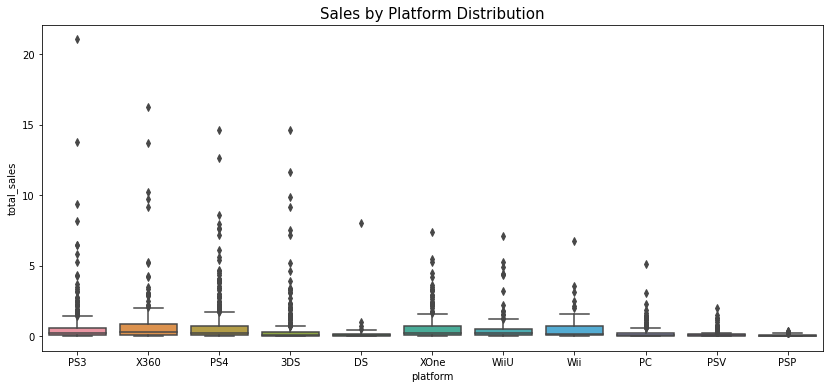

In [34]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=new_df, x='platform', y='total_sales')
plt.title('Sales by Platform Distribution', fontsize=15)
plt.show()

Sekarang kita melihat persebaran datanya, bukan berdasarkan tahun tapi untuk mengetahui penjualan paling banyak setiap transaksi walaupun platform PS4 memiliki penjualan total paling banyak ternyata untuk setiap transaksinya di miliki oleh platform PS3. Dengan sekali penjualan bisa mencapai lebih dari 20 dolar .

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

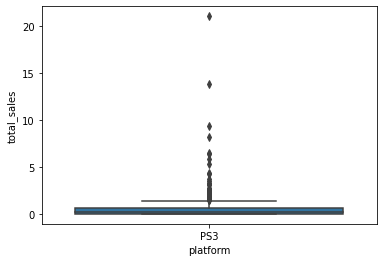

In [35]:
sns.boxplot(data=new_df[new_df['platform'] == 'PS3'], x='platform', y='total_sales')

Akan 

In [36]:
avg_sales_platform = new_df.pivot_table(index='platform', values='total_sales', aggfunc='mean')
avg_sales_platform.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
X360,0.810068
PS4,0.801378
Wii,0.655000
XOne,0.645020
PS3,0.585781
WiiU,0.559116
3DS,0.491439
DS,0.404839
PC,0.250600


Sedangkan untuk rata-rata keseluruhan penjualan berdasarkan platform, Xbox 360 yang memiliki paling banyak nilainya.

### Ulasan Terhadap Penjualan

Setelah mengetahui platform PS4 yang memiliki potensial sebelumnya, sekarang kita akan coba lihat penjualan untuk setiap penilaian baik dari para profesional, ataupun user score yang memiliki korelasi sebagai penunjang keberhasilan penjualan.

In [37]:
ps4_score = (new_df
    .query('platform == "PS4"')
    .pivot_table(index=['platform', 'user_score', 'critic_score'], values='total_sales', aggfunc='sum')
    .reset_index())
ps4_score

,platform,user_score,critic_score,total_sales
0,PS4,1.5,32.0,0.20
1,PS4,1.9,25.0,0.06
2,PS4,2.0,47.0,0.22
3,PS4,2.0,48.0,0.01
4,PS4,2.3,42.0,0.01
...,...,...,...,...
224,PS4,8.7,69.0,0.42
225,PS4,8.7,79.0,0.15
226,PS4,8.7,85.0,0.36
227,PS4,8.8,89.0,1.66


In [38]:
ps4_score.corr()['total_sales']

user_score     -0.019075
critic_score    0.422526
total_sales     1.000000
Name: total_sales, dtype: float64

<AxesSubplot:>

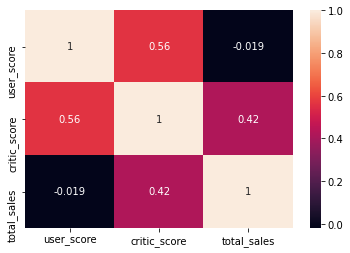

In [39]:
sns.heatmap(ps4_score.corr(), annot=True)

Pada heatmap chart terlihat bahwa korelasi penjualan (total_sales) dengan critic_score memiliki hubungan yang baik daripada penjualan dengan user_score. Dengan nilai critic_score/total_sales yaitu 0.42 mengindikasikan hubungan keduanya memiliki hubungan yang sedang. Lain hal dengan user_score/total_sales yang hanya memiliki nilai -0.019 yang juga mengindikasikan bahwa hubungan antar keduanya bisa dibilang tidak memiliki korelasi sama sekali.

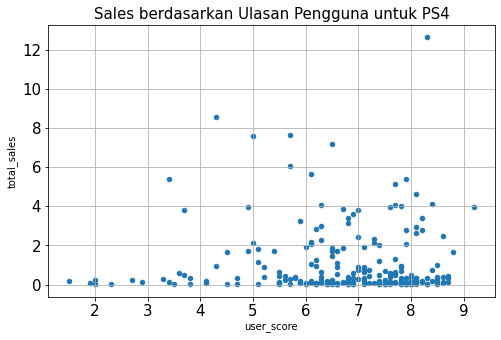

In [40]:
ps4_score.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15)

plt.title('Sales berdasarkan Ulasan Pengguna untuk PS4', fontsize=15)
plt.show()

Ulasan Pengguna:
   - PS4 cukup populer di kalangan para pengguna karna memiliki nilai yang baik dengan range nilai dari 6 - 8.
   - Persebaran nilainya merata, ini merupakan korelasi negatif dimana penilaian banyak berpusat di nilai yang rendah maupun tinggi.

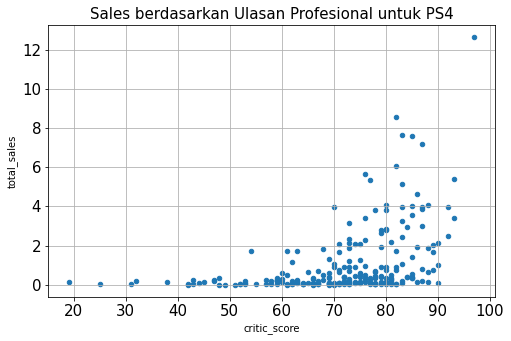

In [41]:
ps4_score.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15)

plt.title('Sales berdasarkan Ulasan Profesional untuk PS4', fontsize=15)
plt.show()

Ulasan Profesional:
   - PS4 juga cukup populer di kalangan para kritikus game karna memiliki nilai yang sangat baik dengan range nilai dari 60 - 90 mendekati 100.
   - Persebaran nilainya sangat baik, ini merupakan korelasi positif dimana penilaian banyak berpusat di nilai yang tinggi.

In [42]:
xone_score = (new_df
    .query('platform == "XOne"')
    .pivot_table(index=['platform', 'user_score', 'critic_score'], values='total_sales', aggfunc='sum')
    .reset_index()
)
xone_score

,platform,user_score,critic_score,total_sales
0,XOne,2.1,39.0,0.12
1,XOne,3.0,23.0,0.20
2,XOne,3.1,20.0,0.09
3,XOne,3.1,36.0,0.20
4,XOne,3.1,56.0,0.01
...,...,...,...,...
150,XOne,8.5,81.0,0.31
151,XOne,8.6,87.0,0.39
152,XOne,8.7,85.0,0.13
153,XOne,8.9,81.0,0.04


In [43]:
xone_score.corr()['total_sales']

user_score     -0.068909
critic_score    0.420686
total_sales     1.000000
Name: total_sales, dtype: float64

<AxesSubplot:>

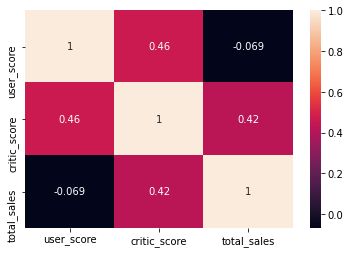

In [44]:
sns.heatmap(xone_score.corr(), annot=True)

Pada heatmap chart terlihat bahwa korelasi penjualan (total_sales) dengan critic_score memiliki hubungan yang baik daripada penjualan dengan user_score. Dengan nilai critic_score/total_sales yaitu 0.42 mengindikasikan hubungan keduanya memiliki hubungan yang sedang. Lain hal dengan user_score/total_sales yang hanya memiliki nilai -0.069 yang juga mengindikasikan bahwa hubungan antar keduanya bisa dibilang tidak memiliki korelasi sama sekali.

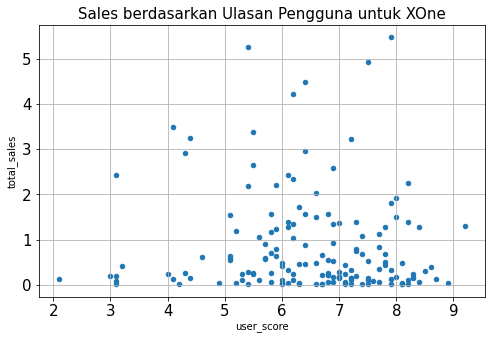

In [45]:
xone_score.plot(x='user_score', y='total_sales', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15)

plt.title('Sales berdasarkan Ulasan Pengguna untuk XOne', fontsize=15)
plt.show()

Ulasan Pengguna:
   - Xbox One di kalangan para pengguna memiliki nilai yang baik dengan range nilai dari 6 - 9.
   - Persebaran nilainya cukup merata, ini merupakan korelasi negatif dimana penilaian banyak berpusat di nilai yang rendah maupun tinggi.

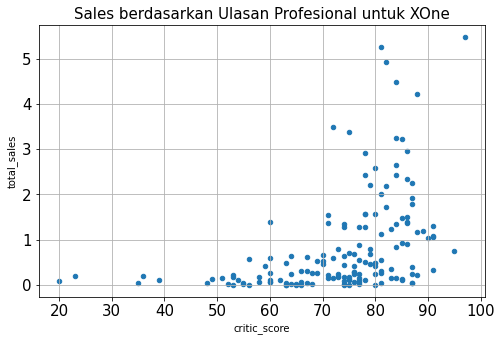

In [46]:
xone_score.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(8, 5),
             grid=True, fontsize=15)

plt.title('Sales berdasarkan Ulasan Profesional untuk XOne', fontsize=15)
plt.show()

Ulasan Profesional:
   - Xbox One cukup populer di kalangan para profesional karna memiliki nilai yang baik dengan range nilai dari 50 - 90 mendekati 100.
   - Persebaran nilainya sangat baik, ini merupakan korelasi positif dimana penilaian banyak berpusat di nilai yang tinggi.

### Genre Sales

Kita juga akan mempelajari penjualan pada genre game yang berpeluang untuk meningkatkan pendapatan.

In [47]:
genre_sales = new_df.pivot_table(index='genre', values='total_sales', aggfunc='sum')
genre_sales = genre_sales.sort_values(by='total_sales', ascending=False)
genre_sales

,total_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


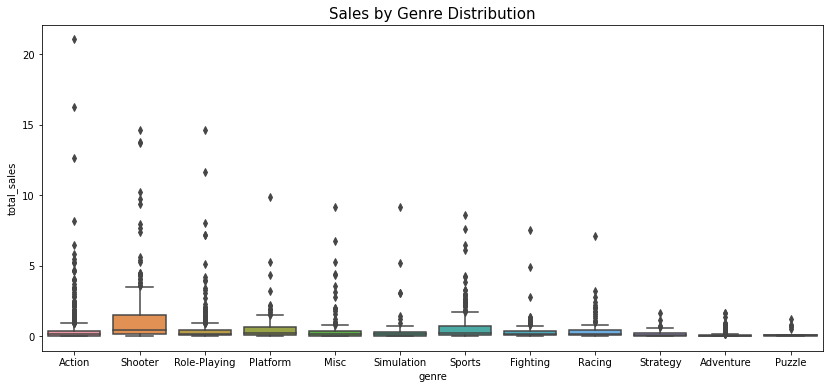

In [48]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=new_df, x='genre', y='total_sales')
plt.title('Sales by Genre Distribution', fontsize=15)
plt.show()

Genre Distribution:
   - Nilai penjualan tertinggi di pegang oleh genre action dengan nilai 441 dolar sekian, sedangkan genre puzzle yang hanya memiliki nilai paling kecil yaitu 4.89 dolar penjualan.
   - Berdasarkan grafik boxplot dari semua genre rata-rata memiliki nilai persebaran yang sama.

<AxesSubplot:xlabel='genre', ylabel='total_sales'>

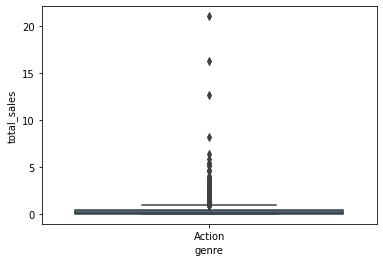

In [49]:
sns.boxplot(data=new_df[new_df['genre'] == 'Action'], x='genre', y='total_sales')

In [50]:
avg_sales_genre = new_df.pivot_table(index='genre', values='total_sales', aggfunc='mean')
avg_sales_genre.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


Pada rata-rata penjualan berdasarkan genre game terlihat perbedaannya cukup signifikan, total sales paling tinggi ada pada genre shooter dengan nilai 1.29 sedangkan yang paling rendah adalah genre adventure dengan nilai 0.09 saja. Genre game merupakan salah satu aspek penting untuk di pertimbangkan para penggunanya.

## Pemrofilan Pengguna untuk Setiap Wilayah

### Top 5 Platform

Mencari tahu top 5 platform berdasarkan wilayah penjualannya masing-masing, mulai dari NA, lalu EU, dan JP.

In [51]:
top5_platform = new_df[['platform', 'na_sales', 'eu_sales', 'jp_sales']].groupby(['platform']).sum().reset_index()
top5_platform

,platform,na_sales,eu_sales,jp_sales
0,3DS,55.31,42.64,87.79
1,DS,4.59,3.53,3.72
2,PC,19.12,37.76,0.00
3,PS3,103.38,106.86,35.29
4,PS4,108.74,141.09,15.96
5,PSP,0.13,0.42,10.47
6,PSV,10.98,11.36,21.04
7,Wii,17.45,11.92,3.39
8,WiiU,38.10,25.13,13.01
9,X360,140.05,74.52,1.57


<AxesSubplot:title={'center':'Sales by Platform'}, xlabel='platform'>

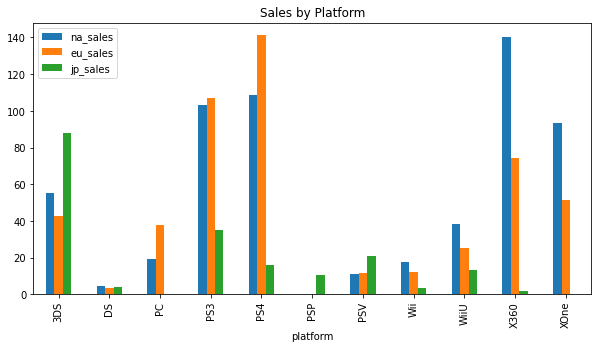

In [52]:
top5_platform.plot(kind='bar', x='platform', figsize=(10, 5), title='Sales by Platform')

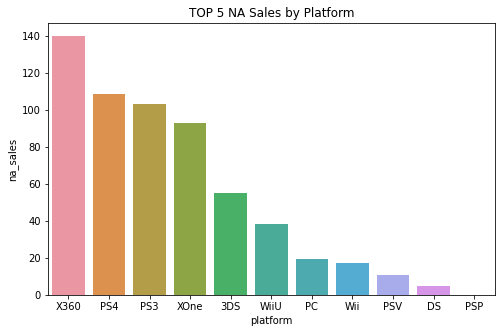

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_platform.sort_values(by='na_sales', ascending=False), x='platform', y='na_sales')
plt.title('TOP 5 NA Sales by Platform')
plt.show()

Top5 NA Platform:
   - Disimpulkan untuk wilayah NA, Top 5 Platform di kuasai oleh Xbox 360, PS4, PS3, Xbox One, dan Nintendo 3DS secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan Xbox 360 memiliki nilai paling tinggi, dimana penjualan mencapai nilai 140 dolar
   - Sedangkan penjualan paling sedikit ada PSP, dimana tidak ada penjualan sama sekali

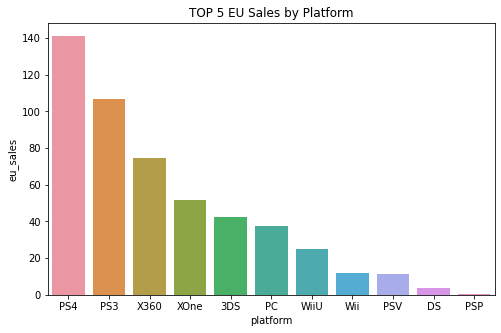

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_platform.sort_values(by='eu_sales', ascending=False), x='platform', y='eu_sales')
plt.title('TOP 5 EU Sales by Platform')
plt.show()

Top5 EU Platform:
   - Disimpulkan untuk wilayah EU, Top 5 Platform di kuasai oleh PS4, PS3, Xbox 360, Xbox One, dan Nintendo 3DS secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan PS4 memiliki nilai paling tinggi, dimana penjualan mencapai nilai 140 dolar
   - Sedangkan penjualan paling sedikit ada PSP, dimana hampir tidak ada penjualan sama sekali

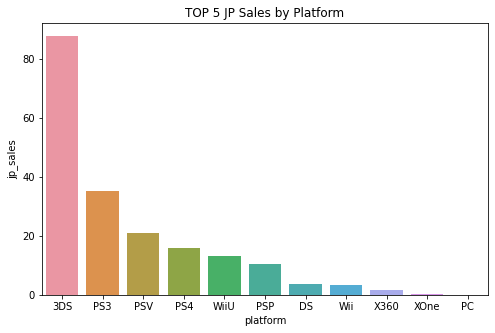

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top5_platform.sort_values(by='jp_sales', ascending=False), x='platform', y='jp_sales')
plt.title('TOP 5 JP Sales by Platform')
plt.show()

Top5 JP Platform:
   - Disimpulkan untuk wilayah JP, Top 5 Platform di kuasai oleh Nintendo 3DS, PS3, PSV, PS4, dan Nintendo WiiU secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan Nintendo 3DS memiliki nilai paling tinggi, dimana penjualan mencapai nilai 80 dolar lebih
   - Sedangkan penjualan paling sedikit ada PC, dimana hampir tidak ada penjualan sama sekali

### Top 5 Genre

Mencari tahu top 5 Genre berdasarkan wilayah penjualannya masing-masing, mulai dari NA, lalu EU, dan JP.

In [56]:
top5_genre = new_df[['genre', 'na_sales', 'eu_sales', 'jp_sales']].groupby(['genre']).sum().reset_index()
top5_genre

,genre,na_sales,eu_sales,jp_sales
0,Action,177.84,159.34,52.80
1,Adventure,8.92,9.46,8.24
2,Fighting,19.79,10.79,9.44
3,Misc,38.19,26.32,12.86
4,Platform,25.38,21.41,8.63
5,Puzzle,1.13,1.40,2.14
6,Racing,17.22,27.29,2.50
7,Role-Playing,64.00,48.53,65.44
8,Shooter,144.77,113.47,9.23
9,Simulation,7.97,14.55,10.41


<AxesSubplot:title={'center':'Sales by Genre'}, xlabel='genre'>

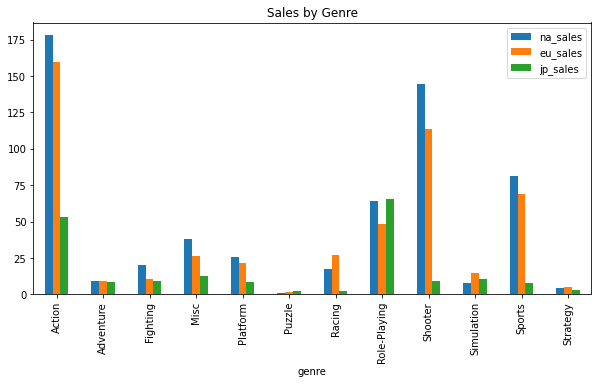

In [57]:
top5_genre.plot(kind='bar', x='genre', figsize=(10, 5), title='Sales by Genre')

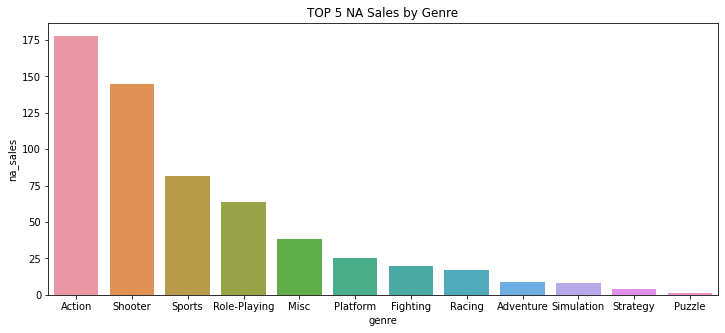

In [58]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top5_genre.sort_values(by='na_sales', ascending=False), x='genre', y='na_sales')
plt.title('TOP 5 NA Sales by Genre')
plt.show()

Top5 NA Genre:
   - Disimpulkan untuk wilayah NA, Top 5 Genre di kuasai oleh Action, Shooter, Sports, Role-Playing, dan Misc secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan Action memiliki nilai paling tinggi, dimana penjualan mencapai nilai 175 dolar
   - Sedangkan penjualan paling sedikit ada Puzzle, dimana hampir tidak ada penjualan sama sekali

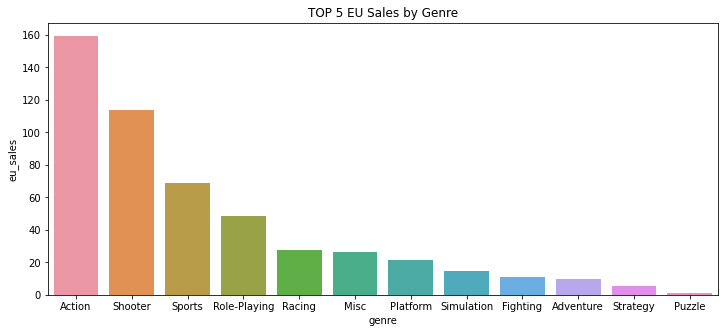

In [59]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top5_genre.sort_values(by='eu_sales', ascending=False), x='genre', y='eu_sales')
plt.title('TOP 5 EU Sales by Genre')
plt.show()

Top5 EU Genre:
   - Disimpulkan untuk wilayah EU, Top 5 Genre di kuasai oleh Action, Shooter, Sports, Role-Playing, dan Racing secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan Action memiliki nilai paling tinggi, dimana penjualan mencapai nilai 160 dolar
   - Sedangkan penjualan paling sedikit ada PC, dimana hampir tidak ada penjualan sama sekali

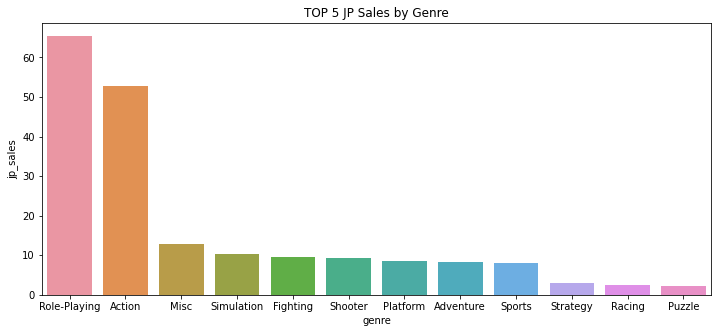

In [60]:
plt.figure(figsize=(12, 5))
sns.barplot(data=top5_genre.sort_values(by='jp_sales', ascending=False), x='genre', y='jp_sales')
plt.title('TOP 5 JP Sales by Genre')
plt.show()

Top5 JP Genre:
   - Disimpulkan untuk wilayah JP, Top 5 Genre di kuasai oleh Role-Playing, Action, Misc, Simulation, dan Fighting secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan Role_Playing memiliki nilai paling tinggi, dimana penjualan mencapai nilai 60 dolar lebih
   - Sedangkan penjualan paling sedikit ada Puzzle, dimana penjualan hanya sekitar 3-5 dolar.

### Rating ESRB

Mencari tahu top Rating ESRB berdasarkan wilayah penjualannya masing-masing, mulai dari NA, lalu EU, dan JP.

In [61]:
rating_esrb = new_df[['rating', 'na_sales', 'eu_sales', 'jp_sales']].groupby(['rating']).sum().reset_index()
rating_esrb

,rating,na_sales,eu_sales,jp_sales
0,E,114.37,113.03,28.33
1,E10+,75.70,55.37,8.19
2,M,231.57,193.96,21.20
3,T,66.02,52.96,26.02


<AxesSubplot:xlabel='rating'>

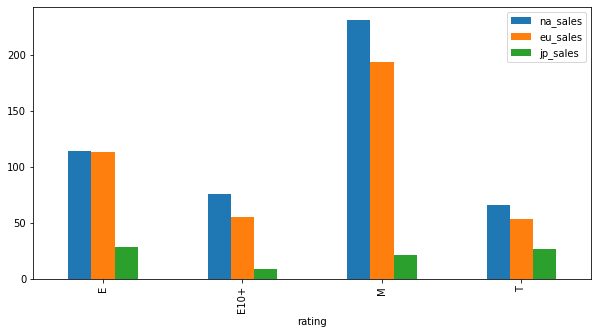

In [62]:
rating_esrb.plot(kind='bar', x='rating', figsize=(10, 5))

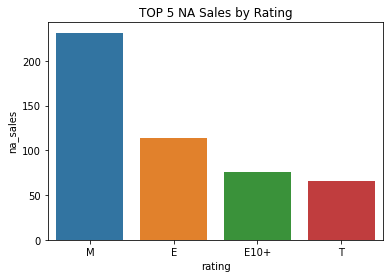

In [63]:
sns.barplot(data=rating_esrb.sort_values(by='na_sales', ascending=False), x='rating', y='na_sales')
plt.title('TOP 5 NA Sales by Rating')
plt.show()

Top Rating ESRB NA:
   - Disimpulkan untuk wilayah NA, Top Rating ESRB di kuasai oleh M, E, E10+, dan T secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan rating M memiliki nilai paling tinggi, dimana penjualan mencapai nilai 200 dolar lebih
   - Sedangkan penjualan paling sedikit ada rating T, dimana penjualan di sekitar 50 dolar.

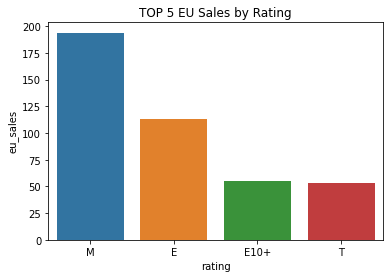

In [64]:
sns.barplot(data=rating_esrb.sort_values(by='eu_sales', ascending=False), x='rating', y='eu_sales')
plt.title('TOP 5 EU Sales by Rating')
plt.show()

Top Rating ESRB EU:
   - Disimpulkan untuk wilayah EU, Top Rating ESRB di kuasai oleh M, E, E10+, dan T secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan rating M memiliki nilai paling tinggi, dimana penjualan mencapai nilai 175 dolar lebih
   - Sedangkan penjualan paling sedikit ada rating T, dimana penjualan di sekitar 50 dolar.

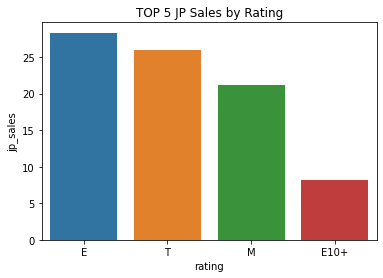

In [65]:
sns.barplot(data=rating_esrb.sort_values(by='jp_sales', ascending=False), x='rating', y='jp_sales')
plt.title('TOP 5 JP Sales by Rating')
plt.show()

Top Rating ESRB JP:
   - Disimpulkan untuk wilayah JP, Top Rating ESRB di kuasai oleh E, T, M, dan E10+ secara berurutan dari besar ke kecil
   - Pada diagram batang menunjukkan rating E memiliki nilai paling tinggi, dimana penjualan mencapai nilai 25 dolar lebih
   - Sedangkan penjualan paling sedikit ada rating E10+, dimana penjualan hanya sekitar 5-8 dolar.

## Uji Hipotesis

### Uji pada Platform Xbox One dan PC

Pengujian hipotesis statistik pertama kita akan membuat tabel platform_user_score untuk user_score yang di urutkan dengan year_of_release guna mencari relasi tahunnya. Setelah itu kita uji statistik berdasarkan Platform unggulan (Xbox One dan PC) untuk mengetahui H0 dan Ha.

Uji Statistik : Two sample t-test independent

Hipotesis :
   - H0 = Apabila rata-rata rating pengguna pada Platform Xbox One dan PC Sama
   - Ha = Apabila rata-rata rating pengguna pada Platform Xbox One dan PC Tidak Sama
   
Alpha : 5% / 0.05

In [66]:
platform_user_score = (new_df
    .query('platform == ("XOne", "PC")')
    .pivot_table(index='year_of_release', columns='platform', values='user_score', aggfunc='mean')
    .reset_index()
)
platform_user_score

platform,year_of_release,PC,XOne
0,2012,6.911765,NaN
1,2013,6.163636,5.811765
2,2014,6.302632,6.738636
3,2015,6.294872,6.474545
4,2016,6.297778,6.598485


In [67]:
from scipy import stats as st

xone = platform_user_score['XOne']
pc = platform_user_score['PC']

alpha = 0.05

results = st.ttest_ind(xone, pc, nan_policy='omit', equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")
print()
print('Rata-rata rating pengguna di xone', xone.mean())
print('Rata-rata rating pengguna di pc', pc.mean())

p-value:  0.9634451114076383
Kita tidak bisa menolak hipotesis nol

Rata-rata rating pengguna di xone 6.405857843137256
Rata-rata rating pengguna di pc 6.394136444223132


Analisis statistik menunjukkan bahwa :
  - P-Value Rata-rata Rating Pengguna untuk Platform Xbox One dan PC adalah 96%
  - Kita tidak bisa menolak H0, yang mengindikasikan rata-rata Rating Pengguna untuk Platform Xbox One dan PC Sama

Hasil analisis memang menunjukkan rata-rata rating pengguna dari Platform XOne dan PC Sama. Bisa jadi dikarenakan perhitungan dilakukan secara keseluruhan wilayah baik di NA, EU, JP, atau Other. Apabila kita lakukan perbandingan dengan spesfik  wilayah bisa jadi hasilnya akan berbeda.

### Uji pada Genre Action dan Sport

Pengujian hipotesis statistik pertama kita akan membuat tabel platform_user_score untuk user_score yang di urutkan dengan year_of_release guna mencari relasi tahunnya. Setelah itu kita uji statistik berdasarkan Genre (Action dan Sports) untuk mengetahui H0 dan Ha.

Uji Statistik : Two sample t-test independent

Hipotesis :
   - H0 = Apabila rata-rata rating pengguna pada Genre Action dan Sport Sama
   - Ha = Apabila rata-rata rating pengguna pada Genre Action dan Sport Tidak Sama
   
Alpha : 5% / 0.05

In [68]:
genre_user_score = (new_df
    .query('genre == ("Action", "Sports")')
    .pivot_table(index='year_of_release', columns='genre', values='user_score', aggfunc='mean')
    .reset_index()
)
genre_user_score

genre,year_of_release,Action,Sports
0,2012,6.788806,6.451429
1,2013,7.085870,5.287879
2,2014,6.672115,5.273333
3,2015,6.941667,5.006667
4,2016,6.638824,5.432432


In [69]:
from scipy import stats as st

action = genre_user_score['Action']
sport = genre_user_score['Sports']

alpha = 0.05

results = st.ttest_ind(action, sport, nan_policy='omit', equal_var=False)
print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Kita menolak hipotesis nol")
else:
    print("Kita tidak bisa menolak hipotesis nol")
print()
print('Rata-rata rating pengguna di Action', action.mean())
print('Rata-rata rating pengguna di Sport', sport.mean())

p-value:  0.004132522675694991
Kita menolak hipotesis nol

Rata-rata rating pengguna di Action 6.8254562232120914
Rata-rata rating pengguna di Sport 5.490347958347959


Analisis statistik menunjukkan bahwa :
  - P-Value Rata-rata Rating Pengguna untuk Genre Action dan Sport adalah 0.41%
  - Kita menolak H0, yang mengindikasikan rata-rata Rating Pengguna untuk Genre Action dan Sport Tidak Sama

Hasil analisis memang menunjukkan rata-rata rating pengguna dari genre Action dan Sports Tidak Sama. Bisa jadi dikarenakan genre Action bisa dinikmati oleh semua kalangan sebagai entertainment, sedangkan genre Sports terkesan game serius yang butuh skill yang baik seperti in real life bagi beberapa orang terlihat pada nilai rata-ratanya yang hanya 5.4 berbanding dengan action yang 6.8. Kembali lagi pada minat orang yang berbeda-beda tidak menutup kemungkinan bahwa kebutuhan akan hiburan pengguna game bisa bervariasi tergantung oleh musim atau kepopuleran game itu sendiri atau hal lainnya.

## Kesimpulan Umum

Diawali dengan inisialisasi library menggunakan pandas, numpy, matplotlib, seaborn, dan scipy.stats. Lalu kita memuat datasetnya dengan nama df dan memiliki 16715 total baris serta kolomnya yang terdiri dari 'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'.

Mempersiapkan data:
   - Memperbaiki nilai yang hilang pada kolom Years_of_Release dengan nilai 0. Sedangkan pada kolom Critic_Score, Rating, dan User_Score akan kita hiraukan dahulu. Pada kolom Name, dan Genre akan kita eliminasi mengingat hanya 2 nilai yang hilang dari total 16715 baris.
   - Mengganti nilai 'tbd' pada kolom user_score menjadi nilai NaN menggunakan numpy
   - Mengubah tipe data pada kolom year_of_release menjadi int, dan kolom user_score menjadi float.

Mempelajari parameter data:
   - Pada hasil grafik batang menunjukkan bahwa game yang paling banyak dirilis yaitu pada tahun 2007 - 2011, dengan tahun 2008 dan 2009 yang memiliki perilisan game paling banyak lebih dari 1400 game per tahunnya. Akan tetapi terjadi penurunan yang signifikan pada tahun 2012.
   - Sedangkan pada grafik untuk platform 'PS2' memiliki penjualan paling banyak hingga lebih dari 1200 dolar, kemudian ada Xbox 360, PS 3, dan lainnya. Mengingat data yang kita miliki merupakan data dari tahun 1980 hingga tahun 2016, kita hanya memiliki sedikit informasi apakah data tersebut relevan dengan tahun saat ini. Bisa jadi untuk tahun sekarang Xbox One atau PC yang memiliki penjualan paling banyak.

Analisis data:
   - Setelah kita mensortir datanya untuk 5 tahun kebelakang, sekarang kita memiliki data yang relevan dengan PS4 yang memiliki nilai tertinggi dengan lebih dari 300 dolar penjualan. Mengingat PS4 merupakan platform dengan keluaran terbaru dari pendahulunya yaitu PS3 ataupun PS2 ini mengindikasikan juga bahwa data historis perlu kita teliti kembali untuk mencari aktual data yang eksis untuk waktu sekarang.
   - Pengujian heatmap chart terlihat bahwa korelasi penjualan (total_sales) dengan critic_score memiliki hubungan yang baik daripada penjualan dengan user_score. Dengan nilai critic_score/total_sales yaitu 0.42 mengindikasikan hubungan keduanya memiliki hubungan yang sedang. Lain hal dengan user_score/total_sales yang hanya memiliki nilai -0.019 yang juga mengindikasikan bahwa hubungan antar keduanya bisa dibilang tidak memiliki korelasi sama sekali.
   - Genre Distribution, nilai penjualan tertinggi di pegang oleh genre action dengan nilai 441 dolar sekian, sedangkan genre puzzle yang hanya memiliki nilai paling kecil yaitu 4.89 dolar penjualan. Berdasarkan grafik boxplot dari semua genre rata-rata memiliki nilai persebaran yang sama.
   
Pemrofilan pengguna tiap wilayah:
1. Profil Penjualan berdasarkan Platform:
   - Top 5 Platform untuk wilayah NA di kuasai oleh Xbox 360, PS4, PS3, Xbox One, dan Nintendo 3DS.
   - Top 5 Platform untuk wilayah EU di kuasai oleh PS4, PS3, Xbox 360, Xbox One, dan Nintendo 3DS.
   - Top 5 Platform untuk wilayah JP di kuasai oleh Nintendo 3DS, PS3, PSV, PS4, dan Nintendo WiiU.


2. Profil Penjualan berdasarkan Genre:
   - Top 5 Genre untuk wilayah NA terbanyak adalah Action, Shooter, Sports, Role-Playing, dan Misc.
   - Top 5 Genre untuk wilayah EU terbanyak adalah Action, Shooter, Sports, Role-Playing, dan Racing.
   - Top 5 Genre untuk wilayah JP terbanyak adalah Role-Playing, Action, Misc, Simulation, dan Fighting.


3. Profil Rating:
   - Top Rating ESRB untuk wilayah NA dari besar ke kecil adalah M, E, E10+, dan T.
   - Top Rating ESRB untuk wilayah EU dari besar ke kecil adalah M, E, E10+, dan T.
   - Top Rating ESRB untuk wilayah JP dari besar ke kecil adalah E, T, M, dan E10+.

Uji Hipotesis:
 - Uji Statistik : Two sample t-test independent 
 - Alpha : 5% / 0.05

1. Uji Rating Pengguna pada Platform XOne dan PC:
    - Hipotesis :
       - H0 = Apabila rata-rata rating pengguna pada Platform Xbox One dan PC Sama
       - Ha = Apabila rata-rata rating pengguna pada Platform Xbox One dan PC Tidak Sama
    - P-Value Rata-rata Rating Pengguna untuk Platform Xbox One dan PC adalah 96%.
    - Kita tidak bisa menolak H0, yang mengindikasikan rata-rata Rating Pengguna untuk Platform Xbox One dan PC Sama.
    - Hasil analisis menunjukkan rata-rata rating pengguna dari Platform XOne dan PC Sama. Bisa jadi dikarenakan perhitungan dilakukan secara keseluruhan wilayah baik di NA, EU, JP, atau Other. Apabila kita lakukan perbandingan dengan spesfik di satu wilayah bisa jadi hasilnya akan berbeda.


2. Uji Rating Pengguna pada Genre Action dan Sports:
    - Hipotesis :
       - H0 = Apabila rata-rata rating pengguna pada Genre Action dan Sport Sama
       - Ha = Apabila rata-rata rating pengguna pada Genre Action dan Sport Tidak Sama
    - P-Value Rata-rata Rating Pengguna untuk Genre Action dan Sport adalah 0.41%.
    - Kita menolak H0, yang mengindikasikan rata-rata Rating Pengguna untuk Genre Action dan Sport Tidak Sama.
    - Hasil analisis memang menunjukkan rata-rata rating pengguna dari genre Action dan Sports Tidak Sama. Bisa jadi dikarenakan genre Action bisa dinikmati oleh semua kalangan sebagai entertainment, sedangkan genre Sports terkesan game serius yang butuh skill yang baik seperti in real life bagi beberapa orang. Terlihat pada nilai rata-ratanya yang hanya 5.4 berbanding dengan action yang 6.8. Kembali lagi pada minat orang yang berbeda-beda tidak menutup kemungkinan bahwa kebutuhan akan hiburan pengguna game bisa bervariasi tergantung oleh musim atau kepopuleran game itu sendiri atau hal lainnya.
    
Diakhiri dengan hipotesis menyimpulkan bahwa kemungkinan rating pengguna bisa jadi tidak akan berubah atau akan sama hasilnya untuk pengguna pada platform Xbox One maupun PC dengan nilai p-value yang tinggi di angka 96% dari 5 tahun terakhir hingga tahun sekarang. Sedangkan untuk kemungkinan rating pengguna pada genre game yang dimainkan mendapati perubahan atau tidak selalu sama dari 5 tahun kebelakang hingga saat ini, dengan nilai p-value yang menunjukkan angka 0.41% probability.

Kesimpulan untuk menjawab tujuan kita yaitu, platform yang memiliki potensi penjualan yang baik terdapat pada PS4 mengingat platform tersebut memiliki nilai total sales terbanyak selama 5 tahun kebelakang, serta PS4 selalu memiliki penjualan di semua wilayah yang diuji. Lalu pada genre yang paling populer yaitu Action. 